In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sys
sys.path.append("..")

from LeastSquarewithReg import LSReg as LS
from LinearRegression import LinearRegression as LR


sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Set2"))
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 3})

def create_degree_x(raw_x, degree):
    new_x = []
    for w in raw_x:
        xx = []
        for i in range(degree+1):
            xx.append(w**i)
        new_x.append(xx)
    return np.array(new_x)

def mse(a, b):
    err = np.mean((a-b)**2)
    return err

In [12]:
sin = lambda x: np.sin(np.pi*x)

n_res = 1000
x = np.linspace(-1, 1, n_res)
y = sin(x)
noise = np.random.randn(n_res)/5
y_noise = y + noise

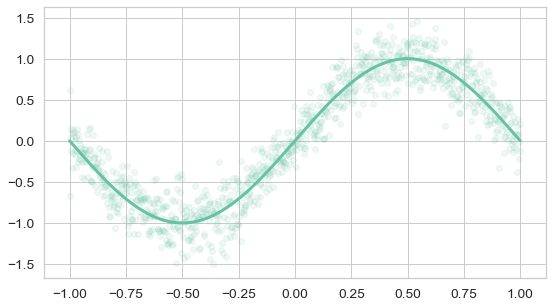

In [13]:
fig = plt.figure(figsize=(9, 5))
plt.plot(x, y)
plt.scatter(x, y_noise, alpha=0.1)

In [14]:
repeat = 10
num_sample = 10
lmbda = np.arange(0.01, 0.5, 0.01)

degree = 9

weights = []
mean_weights = []

for l in lmbda:
    print(f'Lambda: {l}')

#     fig = plt.figure(figsize=(3, 2))
#     plt.axis([-1, 1, -1.5, 1.5])
#     plt.title(f'Lambda = {l}')
    
    lambda_w = []
    
    for r in range(repeat):
#         print(f'ROUND: {r}')
        sample_ind = np.random.randint(0, n_res, num_sample)
        x_sample = np.take(x, sample_ind)
        y_sample = np.take(y_noise, sample_ind)

        x_sample_aug = create_degree_x(x_sample, degree)
        x_aug = create_degree_x(x, degree)
        
        ls = LS(x_sample_aug, y_sample, l)
        w = ls.parameters
        
        predicted_y = x_aug.dot(w.T)
        
#         sns.lineplot(x, predicted_y)
        
        lambda_w.append(w)
    weights.append(lambda_w)
    mean_weights.append(np.mean(lambda_w, axis=0))
    
weights = np.array(weights)
mean_weights = np.array(mean_weights)

Lambda: 0.01
Lambda: 0.02
Lambda: 0.03
Lambda: 0.04
Lambda: 0.05
Lambda: 0.060000000000000005
Lambda: 0.06999999999999999
Lambda: 0.08
Lambda: 0.09
Lambda: 0.09999999999999999
Lambda: 0.11
Lambda: 0.12
Lambda: 0.13
Lambda: 0.14
Lambda: 0.15000000000000002
Lambda: 0.16
Lambda: 0.17
Lambda: 0.18000000000000002
Lambda: 0.19
Lambda: 0.2
Lambda: 0.21000000000000002
Lambda: 0.22
Lambda: 0.23
Lambda: 0.24000000000000002
Lambda: 0.25
Lambda: 0.26
Lambda: 0.27
Lambda: 0.28
Lambda: 0.29000000000000004
Lambda: 0.3
Lambda: 0.31
Lambda: 0.32
Lambda: 0.33
Lambda: 0.34
Lambda: 0.35000000000000003
Lambda: 0.36000000000000004
Lambda: 0.37
Lambda: 0.38
Lambda: 0.39
Lambda: 0.4
Lambda: 0.41000000000000003
Lambda: 0.42000000000000004
Lambda: 0.43
Lambda: 0.44
Lambda: 0.45
Lambda: 0.46
Lambda: 0.47000000000000003
Lambda: 0.48000000000000004
Lambda: 0.49


In [15]:
weights.shape

(49, 10, 10)

In [16]:
mean_weights.shape

(49, 10)

# Calculate Bias

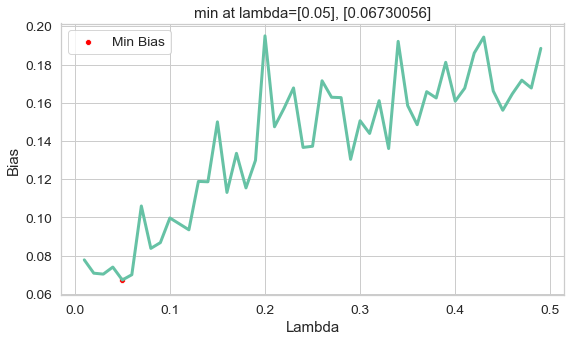

In [17]:
x_aug = create_degree_x(x, degree)
bias = [ mse(x_aug.dot(w.T), y_noise) for w in mean_weights ]
bias = np.array(bias)

fig = plt.figure(figsize=(9, 5))
sns.lineplot(lmbda, bias)
min_index = np.where(bias == np.amin(bias))
sns.scatterplot(lmbda[min_index], bias[min_index], color='red', label='Min Bias')
plt.title(f'min at lambda={lmbda[min_index]}, {bias[min_index]}')
plt.xlabel('Lambda')
plt.ylabel('Bias')
plt.savefig('./02-lambda-bias.png', dpi=150)

# Calculate Variance

In [18]:
x_aug = create_degree_x(x, degree)
variance = []

for i in range(len(lmbda)):
    all_model_res = [[x_aug.dot(w.T)] for w in weights[i]]
    var = mse(all_model_res, x_aug.dot(mean_weights[i]))
    variance.append(var)
variance = np.array(variance)

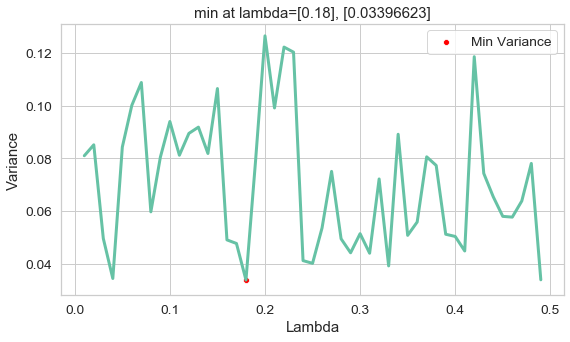

In [19]:
fig = plt.figure(figsize=(9, 5))
plt.xlabel('Lambda')
plt.ylabel('Variance')
sns.lineplot(lmbda, variance)
min_index = np.where(variance == np.amin(variance))
sns.scatterplot(lmbda[min_index], variance[min_index], color='red', label='Min Variance')
plt.title(f'min at lambda={lmbda[min_index]}, {variance[min_index]}')
plt.savefig('./02-lambda-var.png', dpi=150)

# plot bias + variance

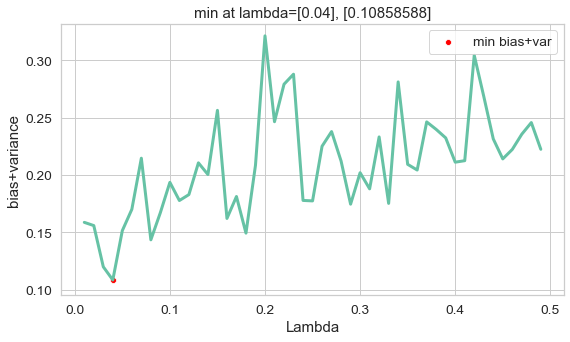

In [21]:
fig = plt.figure(figsize=(9, 5))
sns.lineplot(lmbda, bias+variance)
min_index = np.where(bias+variance == np.amin(bias+variance))
sns.scatterplot(lmbda[min_index], (bias+variance)[min_index], color='red', label=f'min bias+var')
plt.xlabel('Lambda')
plt.ylabel('bias+variance')
plt.title(f'min at lambda={lmbda[min_index]}, {(bias+variance)[min_index]}')
plt.savefig('./02-lambda-biasvar.png', dpi=150)